In [314]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

Loading the data

In [315]:
weekly_returns = pd.read_parquet(path=r"funnel\financial_data\all_etfs_rets.parquet.gzip")

In [316]:
weekly_returns.columns

MultiIndex([('DK0016111511',          'Wealth Invest Amalie Global AK'),
            ('DK0060821064',              'BankInvest Danske Aktier W'),
            ('DK0016112832',       'BankInvest Emerging Markets Obl A'),
            ('DK0060019552',   'BankInvest Emerging Markets Obl Akk A'),
            ('DK0060822112', 'BankInvest Em Markets Obl Lokalvaluta W'),
            ('DK0060823193',   'BankInvest Emerging Markets Obl Akk W'),
            ('DK0016060346',              'BankInvest Danske Aktier A'),
            ('DK0060012037', 'BankInvest Em Markets Obl Lokalvaluta A'),
            ('DK0016026750',              'BankInvest Almen Bolig udb'),
            ('DK0060822039',       'BankInvest Emerging Markets Obl W'),
            ...
            ('DK0061545654',    'Nordea Invest Stabil Balanceret KL 2'),
            ('DK0061542206',              'Nordea Invest Basis 3 KL 2'),
            ('DK0061544681',        'Nordea Invest HøjrenteLande KL 2'),
            ('DK0061541828',       

Fixing Column name issue

In [317]:
names = weekly_returns.columns.get_level_values(1)

In [318]:
# Set the columns to be only the first part of the tuple (the ISIN)
weekly_returns.columns = weekly_returns.columns.get_level_values(0)

In [319]:
weekly_returns.columns

Index(['DK0016111511', 'DK0060821064', 'DK0016112832', 'DK0060019552',
       'DK0060822112', 'DK0060823193', 'DK0016060346', 'DK0060012037',
       'DK0016026750', 'DK0060822039',
       ...
       'DK0061545654', 'DK0061542206', 'DK0061544681', 'DK0061541828',
       'DK0061541901', 'DK0061543444', 'DK0061542982', 'DK0061545811',
       'DK0061542396', 'DK0061543360'],
      dtype='object', length=754)

In [320]:
# create dictionary using the ISIN as key and the name as value. 
isin_dict = dict(zip(weekly_returns.columns, names))

In [321]:
# Map the existing columns to their corresponding ISIN names
weekly_returns.columns = weekly_returns.columns.map(isin_dict)

In [322]:
weekly_returns

,Wealth Invest Amalie Global AK,BankInvest Danske Aktier W,BankInvest Emerging Markets Obl A,BankInvest Emerging Markets Obl Akk A,BankInvest Em Markets Obl Lokalvaluta W,BankInvest Emerging Markets Obl Akk W,BankInvest Danske Aktier A,BankInvest Em Markets Obl Lokalvaluta A,BankInvest Almen Bolig udb,BankInvest Emerging Markets Obl W,...,Nordea Invest Stabil Balanceret KL 2,Nordea Invest Basis 3 KL 2,Nordea Invest HøjrenteLande KL 2,Nordea Invest Aktier KL 2,Nordea Invest Aktier II KL 2,Nordea Invest European Sm Cap Stars KL2,Nordea Invest Emerging Markets KL 2,Nordea Invest Stabile Aktier Akk KL 2,Nordea Invest Basis 4 KL 2,Nordea Invest European Stars KL 2
2013-01-09 00:00:00+00:00,0.013074,0.014113,0.001879,0.002769,0.011412,0.002769,0.014113,0.011412,0.001283,0.001879,...,0.009270,0.013735,0.000869,0.015835,0.015204,0.008671,0.013532,0.013222,0.012706,-0.002460
2013-01-16 00:00:00+00:00,-0.011245,0.000155,0.000134,0.000132,-0.017181,0.000132,0.000155,-0.017181,-0.000296,0.000134,...,-0.000810,-0.004976,-0.000395,-0.005092,-0.005133,-0.007494,-0.018481,0.006167,-0.004347,0.000260
2013-01-23 00:00:00+00:00,0.009563,0.012987,0.002143,0.001775,-0.001826,0.001775,0.012987,-0.001826,-0.001479,0.002143,...,0.004506,0.006847,0.000869,0.010865,0.010286,0.016489,0.010520,0.008883,0.006648,0.008304
2013-01-30 00:00:00+00:00,-0.008705,0.005342,-0.006283,-0.006300,-0.018123,-0.006300,0.005342,-0.018123,-0.003160,-0.006283,...,-0.003858,-0.007182,-0.007656,-0.006932,-0.006755,-0.009940,-0.024998,0.011799,-0.003746,-0.010423
2013-02-06 00:00:00+00:00,-0.001420,0.001366,-0.008340,-0.008453,0.005413,-0.008453,0.001366,0.005413,0.001090,-0.008340,...,-0.002342,-0.003232,-0.011215,-0.000392,-0.000390,-0.001269,0.001224,-0.003655,-0.004947,-0.008843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,-0.001854,0.008015,-0.001367,-0.001477,0.006608,-0.001392,0.008021,0.006486,0.000103,-0.001344,...,0.001289,0.001670,-0.001061,0.003621,0.003511,-0.002326,-0.004054,0.009702,0.002234,0.000505
2024-07-03 00:00:00+00:00,-0.000531,-0.003893,-0.001369,-0.001420,-0.007758,-0.001394,-0.003979,-0.007753,0.000620,-0.001154,...,-0.013037,-0.001608,-0.005212,-0.000442,-0.000557,0.009080,0.018598,-0.010389,-0.001688,0.006464
2024-07-10 00:00:00+00:00,0.009450,0.001414,0.006656,0.006934,0.017642,0.006980,0.001248,0.017656,0.002064,0.006546,...,-0.003262,0.003400,0.009217,0.004715,0.004712,0.001034,0.012540,0.000583,0.003653,0.004917
2024-07-17 00:00:00+00:00,-0.008520,-0.030308,0.004862,0.004944,-0.001478,0.004967,-0.030421,-0.001695,0.003090,0.004973,...,0.019143,0.001784,0.005480,-0.001320,-0.001321,0.015185,-0.013541,0.021911,0.000876,-0.003495


In [323]:
# List of entities to filter
entities_to_filter = ["Sydinvest Global EM Equities B EUR Acc",
                      "Sydinvest Europa Value A DKK",
                        "Sydinvest Virksomhedsobl HY A DKK", 
                      "Sydinvest Korte Obligationer A DKK", 
                      "Sydinvest Fjernøsten A DKK Akk", 
                      "Sydinvest USA Value A DKK"]

In [324]:
# weekly returns 3y, 5y, 10y
weekly_returns_all_funds_3y = weekly_returns.loc['2021-07-21':'2024-07-24']
weekly_returns_all_funds_5y = weekly_returns.loc['2019-07-24':'2024-07-24']
weekly_returns_all_funds_10y = weekly_returns.loc['2014-07-23':'2024-07-24']
# filter. Only keep the ones that are not in entities to filter
weekly_returns_all_funds_3y = weekly_returns_all_funds_3y.loc[:, ~weekly_returns_all_funds_3y.columns.isin(entities_to_filter)]
weekly_returns_all_funds_5y = weekly_returns_all_funds_5y.loc[:, ~weekly_returns_all_funds_5y.columns.isin(entities_to_filter)]
weekly_returns_all_funds_10y = weekly_returns_all_funds_10y.loc[:, ~weekly_returns_all_funds_10y.columns.isin(entities_to_filter)]
# annualized returns 3y, 5y, 10y
cumulative_return_all_funds_3y = (1 + weekly_returns_all_funds_3y).prod() - 1
annualized_returns_3y = (1 + cumulative_return_all_funds_3y)**(1/3) - 1
cumulative_return_all_funds_5y = (1 + weekly_returns_all_funds_5y).prod() - 1
annualized_returns_5y = (1 + cumulative_return_all_funds_5y)**(1/5) - 1
cumulative_return_all_funds_10y = (1 + weekly_returns_all_funds_10y).prod() - 1
annualized_returns_10y = (1 + cumulative_return_all_funds_10y)**(1/10) - 1

# annualized standard deviation 3y, 5y, 10y
annualized_std_3y = weekly_returns_all_funds_3y.std() * np.sqrt(52)
annualized_std_5y = weekly_returns_all_funds_5y.std() * np.sqrt(52)
annualized_std_10y = weekly_returns_all_funds_10y.std() * np.sqrt(52)

Filtering for only keeping the relevant Funds

In [325]:
# List of entities to filter
entities_to_filter = ["Sydinvest Global EM Equities B EUR Acc",
                      "Sydinvest Europa Value A DKK",
                        "Sydinvest Virksomhedsobl HY A DKK", 
                      "Sydinvest Korte Obligationer A DKK", 
                      "Sydinvest Fjernøsten A DKK Akk", 
                      "Sydinvest USA Value A DKK"]
# Filter the columns to only include the entities in the list
weekly_returns = weekly_returns[entities_to_filter]


In [326]:
weekly_returns

,Sydinvest Global EM Equities B EUR Acc,Sydinvest Europa Value A DKK,Sydinvest Virksomhedsobl HY A DKK,Sydinvest Korte Obligationer A DKK,Sydinvest Fjernøsten A DKK Akk,Sydinvest USA Value A DKK
2013-01-09 00:00:00+00:00,0.011429,9.560581e-03,0.010086,0.000877,0.027601,0.020567
2013-01-16 00:00:00+00:00,-0.021644,-1.001639e-02,0.006620,-0.001558,-0.014827,-0.007165
2013-01-23 00:00:00+00:00,0.012757,4.782929e-03,0.000892,-0.000780,0.004935,0.014434
2013-01-30 00:00:00+00:00,-0.020459,7.506408e-03,-0.008352,-0.001367,-0.014547,-0.000889
2013-02-06 00:00:00+00:00,-0.006685,-2.289660e-02,-0.003481,0.000880,-0.000062,0.002225
...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,0.000686,-2.246438e-03,0.001431,0.000105,-0.005557,-0.001743
2024-07-03 00:00:00+00:00,-0.001726,5.966453e-03,0.002025,0.000630,0.008382,-0.003711
2024-07-10 00:00:00+00:00,0.019471,-5.413724e-09,0.003209,0.002204,0.015619,-0.003944
2024-07-17 00:00:00+00:00,-0.016323,1.175022e-02,0.001185,0.002932,-0.027191,0.031236


In [327]:
# 3 year of data
weekly_returns_3y = weekly_returns.loc['2021-07-21':'2024-07-24']
# 5 year of data
weekly_returns_5y = weekly_returns.loc['2019-07-24':'2024-07-24']
# 10 year of data
weekly_returns_10y = weekly_returns.loc['2014-07-23':'2024-07-24']

Annual Returns

In [328]:
cumulative_return_3y = (1 + weekly_returns_3y).prod() - 1
weekly_returns_3y_annual = (1 + cumulative_return_3y)**(1/3) - 1
cumulative_return_5y = (1 + weekly_returns_5y).prod() - 1
weekly_returns_5y_annual = (1 + cumulative_return_5y)**(1/5) - 1
cumulative_return_10y = (1 + weekly_returns_10y).prod() - 1
weekly_returns_10y_annual = (1 + cumulative_return_10y)**(1/10) - 1

In [329]:
# # 3 year annual return
# weekly_returns_3y_annual = (1 + weekly_returns_3y).prod()**(52/len(weekly_returns_3y)) - 1
# # 5 year annual return 
# weekly_returns_5y_annual = (1 + weekly_returns_5y).prod()**(52/len(weekly_returns_5y)) - 1
# # 10 year annual return
# weekly_returns_10y_annual = (1 + weekly_returns_10y).prod()**(52/len(weekly_returns_10y)) - 1

In [330]:
weekly_returns_3y_annual

Sydinvest Global EM Equities B EUR Acc   -0.022246
Sydinvest Europa Value A DKK              0.049733
Sydinvest Virksomhedsobl HY A DKK         0.006306
Sydinvest Korte Obligationer A DKK        0.003685
Sydinvest Fjernøsten A DKK Akk           -0.045187
Sydinvest USA Value A DKK                 0.074375
dtype: float64

In [331]:
weekly_returns_5y_annual

Sydinvest Global EM Equities B EUR Acc    0.042657
Sydinvest Europa Value A DKK              0.062461
Sydinvest Virksomhedsobl HY A DKK         0.019353
Sydinvest Korte Obligationer A DKK        0.002283
Sydinvest Fjernøsten A DKK Akk            0.054578
Sydinvest USA Value A DKK                 0.093295
dtype: float64

Annual Standard Deviations

In [332]:
# 3 year annual std
weekly_returns_3y_std = weekly_returns_3y.std() * np.sqrt(52)
# 5 year annual std
weekly_returns_5y_std = weekly_returns_5y.std() * np.sqrt(52)
# 10 year annual std
weekly_returns_10y_std = weekly_returns_10y.std() * np.sqrt(52)

In [333]:
weekly_returns_3y_std

Sydinvest Global EM Equities B EUR Acc    0.141660
Sydinvest Europa Value A DKK              0.128332
Sydinvest Virksomhedsobl HY A DKK         0.057694
Sydinvest Korte Obligationer A DKK        0.023756
Sydinvest Fjernøsten A DKK Akk            0.143814
Sydinvest USA Value A DKK                 0.128336
dtype: float64

Value at Risk for the different time periods

In [334]:
# Value at Risk for 3 years
VaR_3y = weekly_returns_3y.quantile(0.05)
# Value at Risk for 5 years
VaR_5y = weekly_returns_5y.quantile(0.05)
# Value at Risk for 10 years
VaR_10y = weekly_returns_10y.quantile(0.05)

Conditional Value at Risk for 3, 5 and 10 years horizons

In [335]:
# Conditional Value at Risk for 3 years
CVaR_3y = weekly_returns_3y[weekly_returns_3y <= VaR_3y].mean()
# Conditional Value at Risk for 5 years
CVaR_5y = weekly_returns_5y[weekly_returns_5y <= VaR_5y].mean()
# Conditional Value at Risk for 10 years
CVaR_10y = weekly_returns_10y[weekly_returns_10y <= VaR_10y].mean()

In [362]:
CVaR_3y*100

Sydinvest Global EM Equities B EUR Acc   -4.090726
Sydinvest Europa Value A DKK             -4.174392
Sydinvest Virksomhedsobl HY A DKK        -2.108877
Sydinvest Korte Obligationer A DKK       -0.826566
Sydinvest Fjernøsten A DKK Akk           -3.964152
Sydinvest USA Value A DKK                -4.204404
dtype: float64

In [363]:
CVaR_5y*100

Sydinvest Global EM Equities B EUR Acc   -5.780453
Sydinvest Europa Value A DKK             -6.707895
Sydinvest Virksomhedsobl HY A DKK        -2.967223
Sydinvest Korte Obligationer A DKK       -0.769321
Sydinvest Fjernøsten A DKK Akk           -5.492645
Sydinvest USA Value A DKK                -6.267977
dtype: float64

In [364]:
CVaR_10y*100

Sydinvest Global EM Equities B EUR Acc   -5.685104
Sydinvest Europa Value A DKK             -5.783783
Sydinvest Virksomhedsobl HY A DKK        -2.237369
Sydinvest Korte Obligationer A DKK       -0.574979
Sydinvest Fjernøsten A DKK Akk           -5.677803
Sydinvest USA Value A DKK                -5.557228
dtype: float64

Portfolio Value in the end by multiplying todays prices with amounts of shares held

In [338]:
# portfolio:
# 158x Sydinvest Global EM Equities B EUR Acc at Price 317.08
# 1339x Sydinvest Europa Value A DKK at Price 186.72
# 633x Sydinvest Virksomhedsobl HY A DKK at Price 237.06
# 1009x Sydinvest Korte Obligationer A DKK at Price 198.17
# 315x Sydinvest Fjernøsten A DKK Akk at Price 317.27
# 3046x Sydinvest USA Value A DKK at Price 82.07

# Portfolio value
portfolio_value = 158*317.08 + 1339*186.72 + 633*237.06 + 1009*198.17 + 315*317.27 + 3046*82.07
print(portfolio_value)

1000054.5


Creating Amount dataframe to store the amounts of each of our Funds

In [339]:
# Amount dataframe that shows Shares owned of each ETF
amount = pd.DataFrame(data=[158, 1339, 633, 1009, 315, 3046], 
                      index=["Sydinvest Global EM Equities B EUR Acc",
                      "Sydinvest Europa Value A DKK",
                        "Sydinvest Virksomhedsobl HY A DKK", 
                      "Sydinvest Korte Obligationer A DKK", 
                      "Sydinvest Fjernøsten A DKK Akk", 
                      "Sydinvest USA Value A DKK"], columns=["Amount"])

In [340]:
amount

,Amount
Sydinvest Global EM Equities B EUR Acc,158
Sydinvest Europa Value A DKK,1339
Sydinvest Virksomhedsobl HY A DKK,633
Sydinvest Korte Obligationer A DKK,1009
Sydinvest Fjernøsten A DKK Akk,315
Sydinvest USA Value A DKK,3046


Creating Weekly Prices dataframe by backtracing from the value today.

We do this so that we can get the weekly weights of the Funds

In [341]:
# Price on July 1st, 2024
price_today = pd.DataFrame(data=[317.08, 186.72, 237.06, 198.17, 317.27, 82.07], 
                           index=["Sydinvest Global EM Equities B EUR Acc",
                                  "Sydinvest Europa Value A DKK",
                                  "Sydinvest Virksomhedsobl HY A DKK", 
                                  "Sydinvest Korte Obligationer A DKK", 
                                  "Sydinvest Fjernøsten A DKK Akk", 
                                  "Sydinvest USA Value A DKK"], 
                           columns=["Price"])

# Initialize weekly prices DataFrame
weekly_prices = pd.DataFrame(index=weekly_returns.index, columns=weekly_returns.columns)
weekly_prices.loc[weekly_prices.index[-1]] = price_today['Price']

# Backtrace the prices using the returns
for i in range(len(weekly_returns) - 2, -1, -1):
    weekly_prices.iloc[i] = weekly_prices.iloc[i + 1] / (1 + weekly_returns.iloc[i + 1])

weekly_prices = weekly_prices[::-1]  # Reorder for chronological order

In [342]:
weekly_prices

,Sydinvest Global EM Equities B EUR Acc,Sydinvest Europa Value A DKK,Sydinvest Virksomhedsobl HY A DKK,Sydinvest Korte Obligationer A DKK,Sydinvest Fjernøsten A DKK Akk,Sydinvest USA Value A DKK
2024-07-24 00:00:00+00:00,317.08,186.72,237.06,198.17,317.27,82.07
2024-07-17 00:00:00+00:00,322.863224,186.885359,236.556088,198.06659,324.5,83.95029
2024-07-10 00:00:00+00:00,328.220711,184.714918,236.276143,197.487511,333.570001,81.407425
2024-07-03 00:00:00+00:00,321.951996,184.714919,235.520284,197.053191,328.440001,81.729753
2024-06-26 00:00:00+00:00,322.508636,183.619362,235.044373,196.929112,325.71,82.034188
...,...,...,...,...,...,...
2013-02-06 00:00:00+00:00,194.527793,94.231912,186.271712,183.978428,160.54,22.520475
2013-01-30 00:00:00+00:00,195.837042,96.440062,186.922424,183.816712,160.55,22.470474
2013-01-23 00:00:00+00:00,199.927362,95.721537,188.496729,184.06827,162.92,22.490475
2013-01-16 00:00:00+00:00,197.409046,95.265887,188.328803,184.212017,162.12,22.170468


In [343]:
# reindex the weekly prices to match the weekly returns
weekly_prices = weekly_prices.reindex(weekly_returns.index)

In [344]:
weekly_prices

,Sydinvest Global EM Equities B EUR Acc,Sydinvest Europa Value A DKK,Sydinvest Virksomhedsobl HY A DKK,Sydinvest Korte Obligationer A DKK,Sydinvest Fjernøsten A DKK Akk,Sydinvest USA Value A DKK
2013-01-09 00:00:00+00:00,201.776331,96.229762,187.09035,184.499511,164.56,22.330471
2013-01-16 00:00:00+00:00,197.409046,95.265887,188.328803,184.212017,162.12,22.170468
2013-01-23 00:00:00+00:00,199.927362,95.721537,188.496729,184.06827,162.92,22.490475
2013-01-30 00:00:00+00:00,195.837042,96.440062,186.922424,183.816712,160.55,22.470474
2013-02-06 00:00:00+00:00,194.527793,94.231912,186.271712,183.978428,160.54,22.520475
...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,322.508636,183.619362,235.044373,196.929112,325.71,82.034188
2024-07-03 00:00:00+00:00,321.951996,184.714919,235.520284,197.053191,328.440001,81.729753
2024-07-10 00:00:00+00:00,328.220711,184.714918,236.276143,197.487511,333.570001,81.407425
2024-07-17 00:00:00+00:00,322.863224,186.885359,236.556088,198.06659,324.5,83.95029


Weekly Portfolio Value

In [345]:
# Calculate the value of the portfolio by multiplying the amount of shares with the weekly prices for each fund
# create a dataframe with dates as index and the value of the portfolio as the only column

portfolio_value = np.dot(weekly_prices, amount)
portfolio_value = pd.DataFrame(portfolio_value, index=weekly_returns.index, columns=['Portfolio Value'])
portfolio_value

,Portfolio Value
2013-01-09 00:00:00+00:00,585175.525693
2013-01-16 00:00:00+00:00,582432.754797
2013-01-23 00:00:00+00:00,584628.760766
2013-01-30 00:00:00+00:00,582886.767316
2013-02-06 00:00:00+00:00,579623.616731
...,...
2024-06-26 00:00:00+00:00,996782.039991
2024-07-03 00:00:00+00:00,998520.128335
2024-07-10 00:00:00+00:00,1001061.411432
2024-07-17 00:00:00+00:00,1008771.160833


Weekly Portfolio Returns

In [346]:
# portfolio_returns
portfolio_returns = portfolio_value.pct_change()
# change the name of the column to Portfolio Returns
portfolio_returns.columns = ['Portfolio Returns']

In [347]:
portfolio_returns

,Portfolio Returns
2013-01-09 00:00:00+00:00,NaN
2013-01-16 00:00:00+00:00,-0.004687
2013-01-23 00:00:00+00:00,0.003770
2013-01-30 00:00:00+00:00,-0.002980
2013-02-06 00:00:00+00:00,-0.005598
...,...
2024-06-26 00:00:00+00:00,-0.001297
2024-07-03 00:00:00+00:00,0.001744
2024-07-10 00:00:00+00:00,0.002545
2024-07-17 00:00:00+00:00,0.007702


Annualized Portfolio Returns for 3, 5 and 10 years

In [348]:
portfolio_returns_3y = portfolio_returns.loc['2021-07-21':'2024-07-24']
portfolio_returns_5y = portfolio_returns.loc['2019-07-24':'2024-07-24']
portfolio_returns_10y = portfolio_returns.loc['2014-07-23':'2024-07-24']

In [349]:
# 3 year annual return
cumulative_return_portfolio_3y = (1 + portfolio_returns_3y).prod() - 1
portfolio_returns_3y_annual = (1 + cumulative_return_portfolio_3y)**(1/3) - 1
# 5 year annual return
cumulative_return_portfolio_5y = (1 + portfolio_returns_5y).prod() - 1
portfolio_returns_5y_annual = (1 + cumulative_return_portfolio_5y)**(1/5) - 1
# 10 year annual return
cumulative_return_portfolio_10y = (1 + portfolio_returns_10y).prod() - 1
portfolio_returns_10y_annual = (1 + cumulative_return_portfolio_10y)**(1/10) - 1

In [350]:
portfolio_returns_3y_annual*100

Portfolio Returns    2.408479
dtype: float64

In [351]:
portfolio_returns_5y_annual*100

Portfolio Returns    4.669416
dtype: float64

In [352]:
portfolio_returns_10y_annual*100

Portfolio Returns    4.390161
dtype: float64

Portfolio Standard Deviation

In [353]:
# annualized portfolio std for 3 years
portfolio_returns_3y_std = portfolio_returns_3y.std() * np.sqrt(52)
# annualized portfolio std for 5 years
portfolio_returns_5y_std = portfolio_returns_5y.std() * np.sqrt(52)
# annualized portfolio std for 10 years
portfolio_returns_10y_std = portfolio_returns_10y.std() * np.sqrt(52)

In [367]:
portfolio_returns_3y_std*100

Portfolio Returns    7.749238
dtype: float64

In [368]:
portfolio_returns_5y_std*100

Portfolio Returns    10.866585
dtype: float64

In [369]:
portfolio_returns_10y_std*100

Portfolio Returns    9.656417
dtype: float64

In [357]:
# the weekly returns of the funds should be grouped by month and the variance for that month displayed
# monthly_variance = weekly_returns.resample('M').var()

In [365]:
# Value at Risk for the portfolio 3 years
VaR_portfolio_3y = portfolio_returns_3y.quantile(0.05)
# Conditional Value at Risk for the portfolio 5 years
VaR_portfolio_5y = portfolio_returns_5y.quantile(0.05)
# Conditional Value at Risk for the portfolio 10 years
VaR_portfolio_10y = portfolio_returns_10y.quantile(0.05)

# Conditional Value at Risk for the portfolio 3 years
CVaR_portfolio_3y = portfolio_returns_3y[portfolio_returns_3y <= VaR_portfolio_3y].mean()
# Conditional Value at Risk for the portfolio 5 years
CVaR_portfolio_5y = portfolio_returns_5y[portfolio_returns_5y <= VaR_portfolio_5y].mean()
# Conditional Value at Risk for the portfolio 10 years
CVaR_portfolio_10y = portfolio_returns_10y[portfolio_returns_10y <= VaR_portfolio_10y].mean()

In [366]:
print(f"3 year Portfolio CVaR: {CVaR_portfolio_3y*100}")
print(f"5 year Portfolio CVaR: {CVaR_portfolio_5y*100}")
print(f"10 year Portfolio CVaR: {CVaR_portfolio_10y*100}")

3 year Portfolio CVaR: Portfolio Returns   -2.648302
dtype: float64
5 year Portfolio CVaR: Portfolio Returns   -3.898017
dtype: float64
10 year Portfolio CVaR: Portfolio Returns   -3.285828
dtype: float64


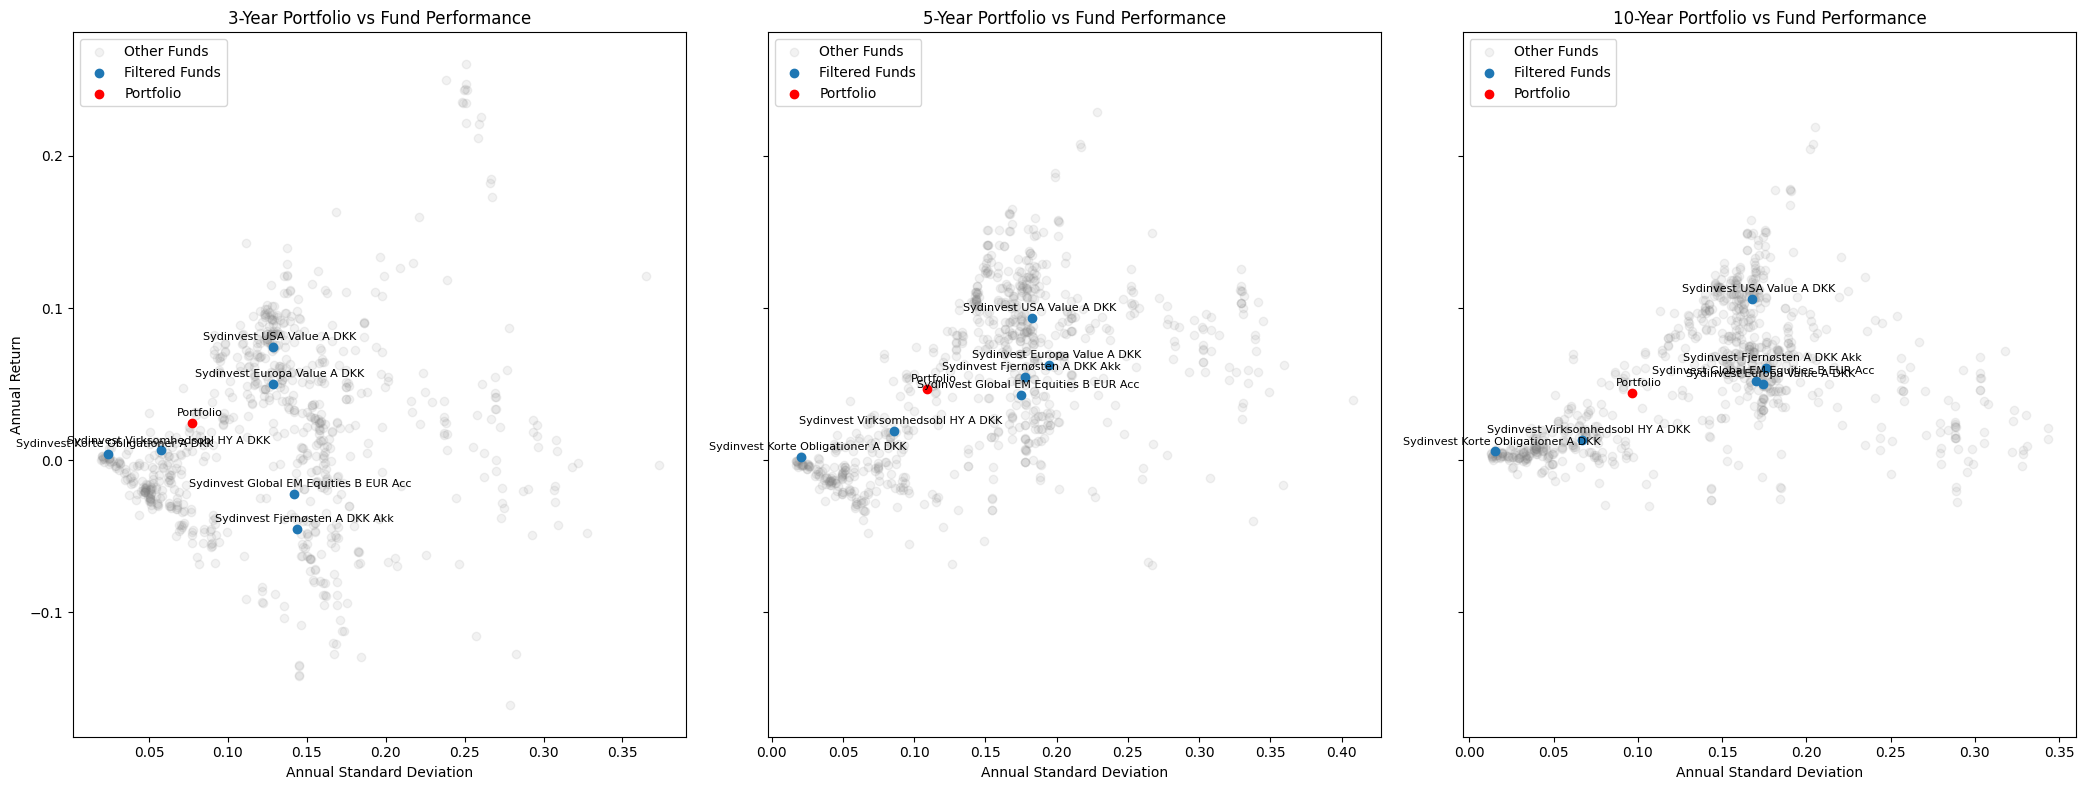

In [371]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (1 row, 3 columns) and a larger size
fig, axs = plt.subplots(1, 3, figsize=(21, 8), sharey=True)

# Plot for 3-year data
axs[0].scatter(annualized_std_3y, annualized_returns_3y, color='gray', alpha=0.1, label='Other Funds')
axs[0].scatter(weekly_returns_3y_std, weekly_returns_3y_annual, label='Filtered Funds')
axs[0].scatter(portfolio_returns_3y_std, portfolio_returns_3y_annual, label='Portfolio', color='red')
axs[0].set_xlabel('Annual Standard Deviation')
axs[0].set_ylabel('Annual Return')

# Annotate the filtered funds
for i, txt in enumerate(weekly_returns.columns):
    axs[0].annotate(txt, (weekly_returns_3y_std[i], weekly_returns_3y_annual[i]),
                    textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

# Annotate the portfolio
axs[0].annotate('Portfolio', (portfolio_returns_3y_std, portfolio_returns_3y_annual),
                textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8, color='black')

axs[0].set_title('3-Year Portfolio vs Fund Performance')
axs[0].legend(loc='upper left')

# Plot for 5-year data
axs[1].scatter(annualized_std_5y, annualized_returns_5y, color='gray', alpha=0.1, label='Other Funds')
axs[1].scatter(weekly_returns_5y_std, weekly_returns_5y_annual, label='Filtered Funds')
axs[1].scatter(portfolio_returns_5y_std, portfolio_returns_5y_annual, label='Portfolio', color='red')
axs[1].set_xlabel('Annual Standard Deviation')

# Annotate the filtered funds
for i, txt in enumerate(weekly_returns.columns):
    axs[1].annotate(txt, (weekly_returns_5y_std[i], weekly_returns_5y_annual[i]),
                    textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

# Annotate the portfolio
axs[1].annotate('Portfolio', (portfolio_returns_5y_std, portfolio_returns_5y_annual),
                textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8, color='black')

axs[1].set_title('5-Year Portfolio vs Fund Performance')
axs[1].legend(loc='upper left')

# Plot for 10-year data
axs[2].scatter(annualized_std_10y, annualized_returns_10y, color='gray', alpha=0.1, label='Other Funds')
axs[2].scatter(weekly_returns_10y_std, weekly_returns_10y_annual, label='Filtered Funds')
axs[2].scatter(portfolio_returns_10y_std, portfolio_returns_10y_annual, label='Portfolio', color='red')
axs[2].set_xlabel('Annual Standard Deviation')

# Annotate the filtered funds
for i, txt in enumerate(weekly_returns.columns):
    axs[2].annotate(txt, (weekly_returns_10y_std[i], weekly_returns_10y_annual[i]),
                    textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

# Annotate the portfolio
axs[2].annotate('Portfolio', (portfolio_returns_10y_std, portfolio_returns_10y_annual),
                textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8, color='black')

axs[2].set_title('10-Year Portfolio vs Fund Performance')
axs[2].legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()